Number of samples: 569
Number of features: 30
Iteration 0: cost = 394.4584
Iteration 200: cost = 395.2807
Iteration 400: cost = 397.2299
Iteration 600: cost = 400.0711
Iteration 800: cost = 403.6075
Iteration 1000: cost = 407.6790
Iteration 1200: cost = 412.1582
Iteration 1400: cost = 416.9441
Iteration 1600: cost = 421.9576
Iteration 1800: cost = 427.1359

Final parameters (first 10 shown):
[-0.02545661  0.04554074  0.03349178  0.05404921  0.04417499  0.01759488
  0.03831989  0.05156238  0.0457045   0.03542208]
Final cost: 432.403485
Training accuracy: 93.85%


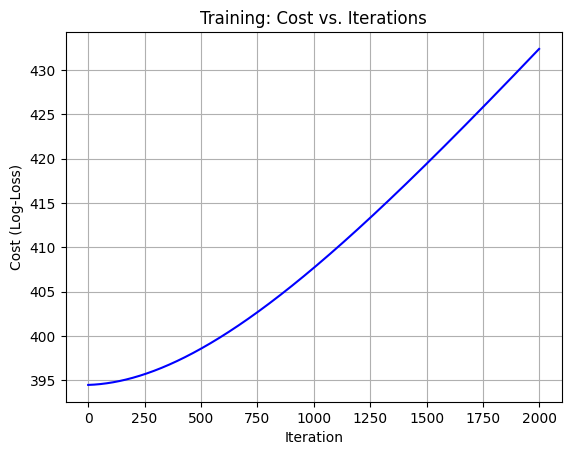

Plotting cost sensitivity for parameter indices: [27 24 21]


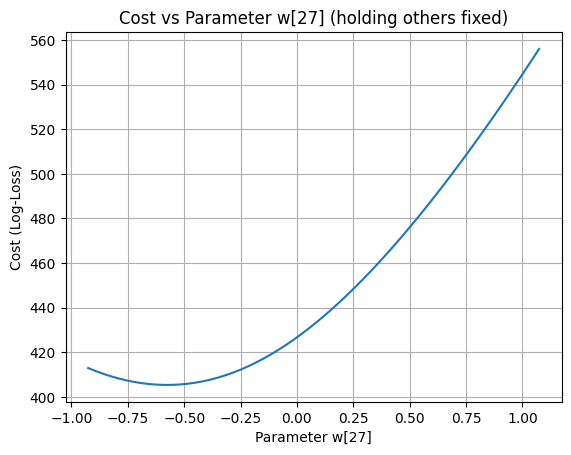

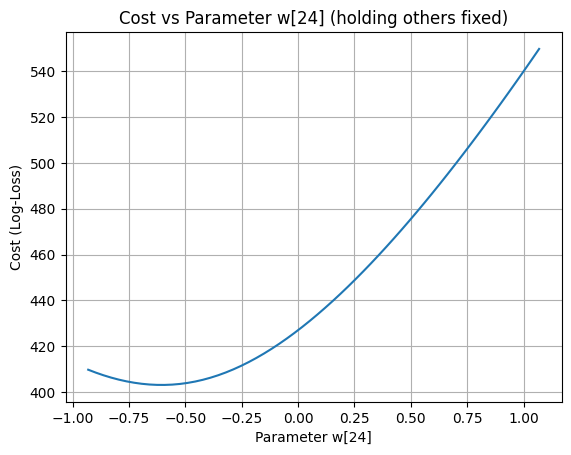

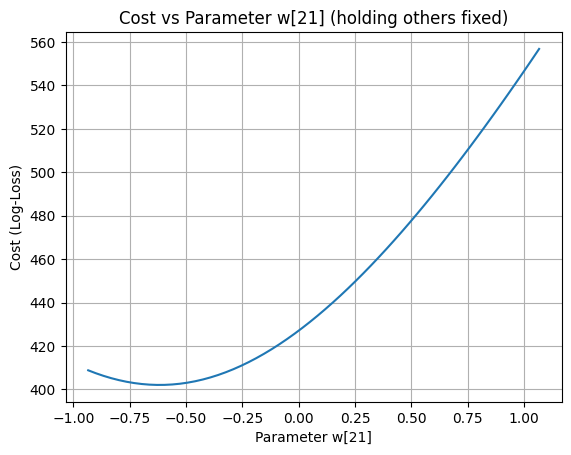

In [ ]:
# ================================
# Logistic Regression (from scratch)
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load & Clean Data
# --------------------------------------------------
data = pd.read_csv("Cancer_Data.csv")

# NaN drop
data = data.drop(columns=['id', 'Unnamed: 32'])

X = data.drop(columns=['diagnosis']).values
y = np.where(data['diagnosis'].values.reshape(-1, 1) == 'M', 1, 0)  # M=1, B=0

m, n = X.shape
print(f"Number of samples: {m}")
print(f"Number of features: {n}")

# Normalize features
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / (X_std + 1e-10)  # Prevent div by 0

# Add bias column (x0 = 1)
X = np.column_stack([np.ones(m), X])  # shape: (m, n+1)
n_with_bias = X.shape[1]

if np.any(np.isnan(X)) or np.any(np.isinf(X)):
    raise ValueError("X contains NaN or Inf after cleaning/normalization.")

# 2) Utility functions
# --------------------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w):
    return sigmoid(X.dot(w))

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    y_true = y_true.ravel()
    y_prob = np.clip(y_prob, eps, 1 - eps)
    m = len(y_true)
    return -(1/m) * np.sum(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

def gradient(X, y_true, y_prob):
    m = len(y_true)
    return (1/m) * X.T.dot(y_prob - y_true)

# 3) Gradient Descent Training
# --------------------------------------------------
learning_rate = 1e-4
num_iterations = 2000

# Small random initialization
w = np.random.randn(n_with_bias, 1) * 0.01

cost_history = []

for i in range(num_iterations):
    # Forward pass
    z = X.dot(w)
    y_prob = sigmoid(z)

    # Compute loss
    cost = binary_cross_entropy(y, y_prob)
    cost_history.append(cost)

    # Backward pass
    grad = gradient(X, y, y_prob)

    # Update weights
    w -= learning_rate * grad

    # Optional: progress print
    if i % 200 == 0:
        print(f"Iteration {i}: cost = {cost:.4f}")

# 4) Results
# --------------------------------------------------
print("\nFinal parameters (first 10 shown):")
print(w.ravel()[:10])
print(f"Final cost: {cost_history[-1]:.6f}")

# Training accuracy
pred_labels = (predict_proba(X, w) >= 0.5).astype(int)
accuracy = np.mean(pred_labels == y)
print(f"Training accuracy: {accuracy*100:.2f}%")

# 5) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()

# 6) Plot: Cost vs 3 Most Important Parameters
# --------------------------------------------------
param_indices = np.argsort(np.abs(w[1:]).ravel())[::-1][:3] + 1  # skip bias term
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    y_hat_mod = predict_proba(X, mod_w)
    return binary_cross_entropy(y, y_hat_mod)

for idx in param_indices:
    center = w[idx]
    sweep = np.linspace(center - 1.0, center + 1.0, 60)
    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()
